# 🔮 Day 4 - All Spells Combined: Statistics & Sampling Adventure

In [1]:
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")

[1] "en_US.UTF-8"

In [2]:
# Load our magical libraries
library(ggplot2)
library(dplyr)
library(gridExtra)
library(infer)  # For rep_sample_n function
set.seed(123)  # For reproducible results

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘infer’ was built under R version 4.3.1”


# 🔮 Day 4 - Spell 1: Distribution Detective Mission

## 🎯 Mission Briefing
Discover the magical secrets of mean, median, and mode through different creature power distributions!

### 💡 What are Distributions?
Think of distributions like different ways data can be shaped - some are balanced (symmetrical), some lean to one side (skewed), and some have unusual outliers!

In [3]:
# Load our magical creature dataset
creatures <- read.csv("../datasets/magical_creatures_stats.csv")

# Let's peek at our data first
head(creatures)

# Separate each creature type for easier analysis
dragons <- creatures[creatures$creature_type == "dragon", ]
unicorns <- creatures[creatures$creature_type == "unicorn", ]
phoenixes <- creatures[creatures$creature_type == "phoenix", ]

cat("We have", nrow(dragons), "dragons,", nrow(unicorns), "unicorns, and", nrow(phoenixes), "phoenixes!")

,creature_id,creature_type,power_level
,<int>,<chr>,<int>
1,1,dragon,71
2,2,dragon,42
3,3,dragon,55
4,4,dragon,59
5,5,dragon,56
6,6,dragon,48


We have 1000 dragons, 1000 unicorns, and 1000 phoenixes!

---

## 🐉 Investigation 1: Dragon Power (Normal Distribution)

Dragons have very balanced power - most dragons are medium strength, with fewer very weak or very strong dragons.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power Distribution (Normal/Symmetrical)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power Distribution (Normal/Symmetrical)' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power Distribution (Normal/Symmetrical)' in 'mbcsToSbcs': dot substituted for <90>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power Distribution (Normal/Symmetrical)' in 'mbcsToSbcs': dot substituted for <89>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power Distribution (Normal/Symmetrical)' in 'mbcsToSbcs': dot substituted for <f0>”
Wa

[1] "🐉 Dragon Power Statistics:"
  mean_power median_power min_power max_power
1     49.656           50         5        98


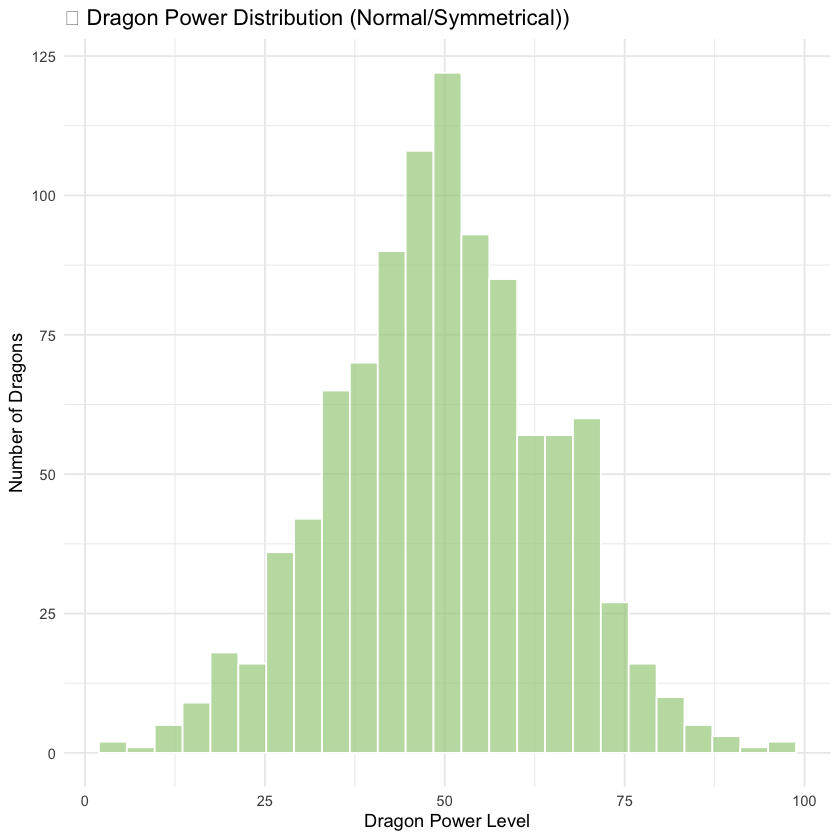

In [4]:
# Create a histogram of dragon power
ggplot(dragons, aes(x = power_level)) +
  geom_histogram(fill ="#a4ce89", color = "white", alpha = 0.7, bins = 25) +
  labs(title = "🐉 Dragon Power Distribution (Normal/Symmetrical)", 
       x = "Dragon Power Level", 
       y = "Number of Dragons") +
  theme_minimal()

# Calculate statistics for dragon power
dragon_stats <- dragons %>%
  summarise(
    mean_power = mean(power_level),
    median_power = median(power_level),
    min_power = min(power_level),
    max_power = max(power_level)
  )

print("🐉 Dragon Power Statistics:")
print(dragon_stats)

### 💡 Key Learning
In symmetrical distributions, mean and median are very close!

---

## 🦄 Investigation 2: Unicorn Power (Left-Skewed Distribution)

Most unicorns have high power, but a few have very low power - this creates a "tail" on the left.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🦄 Unicorn Power Distribution (Left-Skewed)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🦄 Unicorn Power Distribution (Left-Skewed)' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🦄 Unicorn Power Distribution (Left-Skewed)' in 'mbcsToSbcs': dot substituted for <a6>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🦄 Unicorn Power Distribution (Left-Skewed)' in 'mbcsToSbcs': dot substituted for <84>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🦄 Unicorn Power Distribution (Left-Skewed)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call.gra

[1] "🦄 Unicorn Power Statistics:"
  mean_power median_power min_power max_power
1     80.331           82        22       100


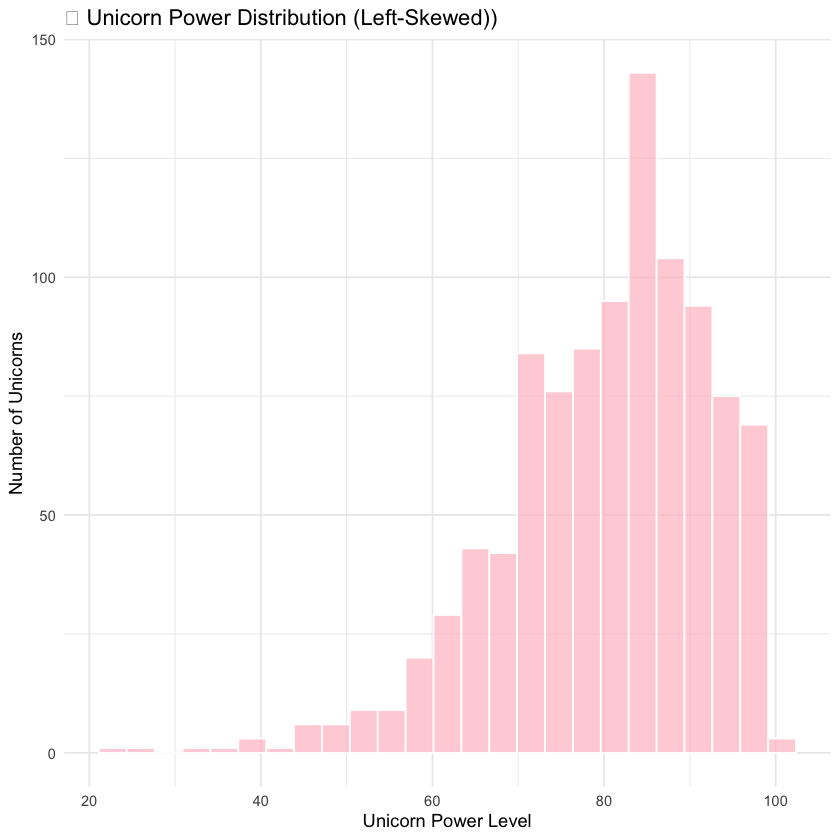

In [5]:
# Create histogram of unicorn magic
ggplot(unicorns, aes(x = power_level)) +
  geom_histogram(fill = "pink", color = "white", alpha = 0.7, bins = 25) +
  labs(title = "🦄 Unicorn Power Distribution (Left-Skewed)", 
       x = "Unicorn Power Level", 
       y = "Number of Unicorns") +
  theme_minimal()

# Calculate statistics for unicorn power
unicorn_stats <- unicorns %>%
  summarise(
    mean_power = mean(power_level),
    median_power = median(power_level),
    min_power = min(power_level),
    max_power = max(power_level)
  )

print("🦄 Unicorn Power Statistics:")
print(unicorn_stats)

### 💡 Key Learning
In left-skewed distributions, the mean is PULLED DOWN by the low values!

---

## 🔥 Investigation 3: Phoenix Power (Right-Skewed Distribution)

Most phoenixes have low power, but a few have extremely high power - this creates a "tail" on the right.

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🔥 Phoenix Power Distribution (Right-Skewed)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🔥 Phoenix Power Distribution (Right-Skewed)' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🔥 Phoenix Power Distribution (Right-Skewed)' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🔥 Phoenix Power Distribution (Right-Skewed)' in 'mbcsToSbcs': dot substituted for <a5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🔥 Phoenix Power Distribution (Right-Skewed)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Cal

[1] "🔥 Phoenix Power Statistics:"
  mean_power median_power min_power max_power
1     19.493           17         0        73


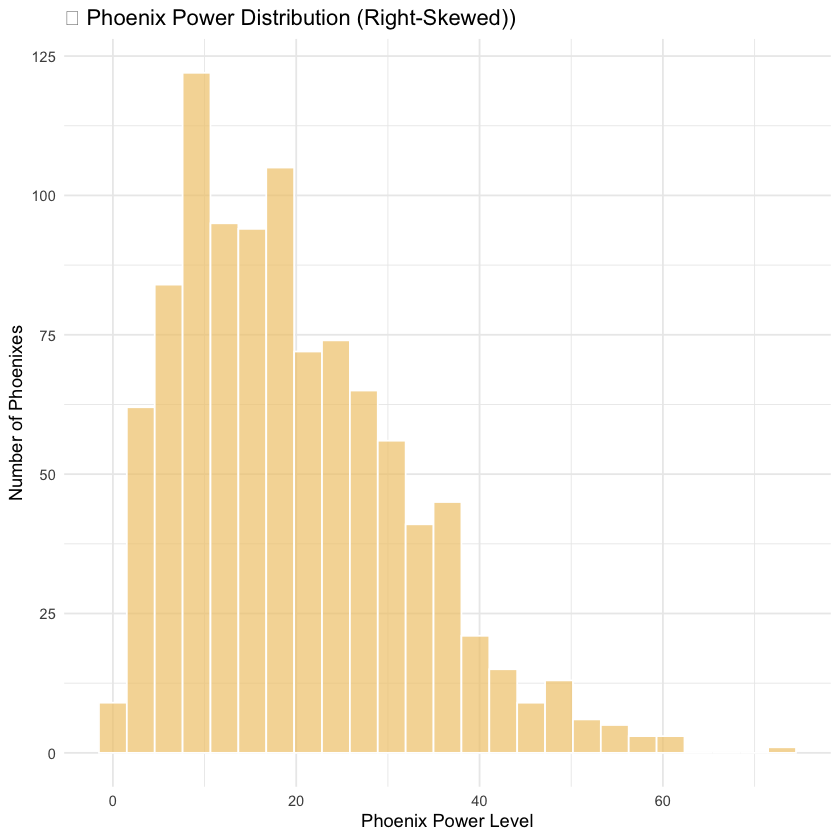

In [6]:
# Create histogram of phoenix energy
ggplot(phoenixes, aes(x = power_level)) +
  geom_histogram(fill = "#f1c979", color = "white", alpha = 0.7, bins = 25) +
  labs(title = "🔥 Phoenix Power Distribution (Right-Skewed)", 
       x = "Phoenix Power Level", 
       y = "Number of Phoenixes") +
  theme_minimal()

# Calculate statistics for phoenix power
phoenix_stats <- phoenixes %>%
  summarise(
    mean_power = mean(power_level),
    median_power = median(power_level),
    min_power = min(power_level),
    max_power = max(power_level)
  )

print("🔥 Phoenix Power Statistics:")
print(phoenix_stats)

### 💡 Key Learning
In right-skewed distributions, the mean is PULLED UP by the high values!

---

## 🎨 Stacked Distribution Gallery

Let's see all three distributions stacked vertically in one beautiful view!

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power (Normal Distribution)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power (Normal Distribution)' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power (Normal Distribution)' in 'mbcsToSbcs': dot substituted for <90>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power (Normal Distribution)' in 'mbcsToSbcs': dot substituted for <89>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🐉 Dragon Power (Normal Distribution)' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot

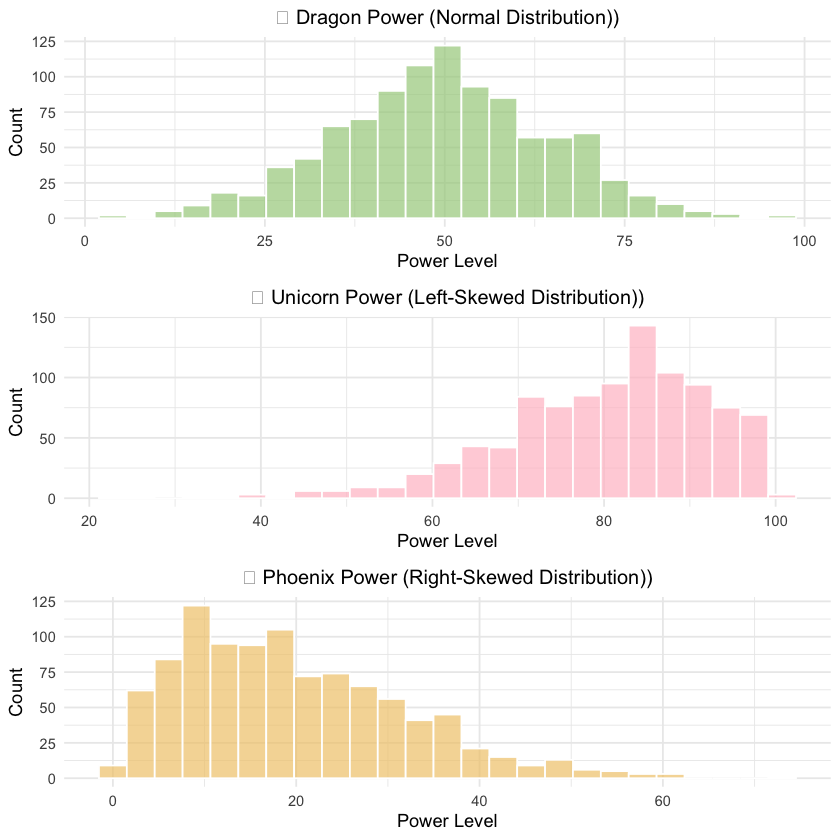

In [7]:
# Create individual plots
p1 <- ggplot(dragons, aes(x = power_level)) +
  geom_histogram(fill ="#a4ce89", color = "white", alpha = 0.7, bins = 25)  +
  labs(title = "🐉 Dragon Power (Normal Distribution)", 
       x = "Power Level", 
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(size = 12, hjust = 0.5))

p2 <- ggplot(unicorns, aes(x = power_level)) +
  geom_histogram(fill = "pink", color = "white", alpha = 0.7, bins = 25) +
  labs(title = "🦄 Unicorn Power (Left-Skewed Distribution)", 
       x = "Power Level", 
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(size = 12, hjust = 0.5))

p3 <- ggplot(phoenixes, aes(x = power_level)) +
  geom_histogram(fill = "#f1c979", color = "white", alpha = 0.7, bins = 25)  +
  labs(title = "🔥 Phoenix Power (Right-Skewed Distribution)", 
       x = "Power Level", 
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(size = 12, hjust = 0.5))

# Stack them in a 3x1 grid (3 rows, 1 column)
grid.arrange(p1, p2, p3, nrow = 3, ncol = 1)

### 💡 What Do You Notice?
Look at how different each shape is! Can you see the "tails" and where most of the data clusters?

---

## 🔍 The Great Comparison Challenge

Let's compare all three distributions with numbers!

In [8]:
# Combine all the statistics
all_stats <- data.frame(
  Creature = c("Dragon (Normal)", "Unicorn (Left-Skewed)", "Phoenix (Right-Skewed)"),
  Mean = c(dragon_stats$mean_power, unicorn_stats$mean_power, phoenix_stats$mean_power),
  Median = c(dragon_stats$median_power, unicorn_stats$median_power, phoenix_stats$median_power),
  Difference = c(
    abs(dragon_stats$mean_power - dragon_stats$median_power),
    abs(unicorn_stats$mean_power - unicorn_stats$median_power),
    abs(phoenix_stats$mean_power - phoenix_stats$median_power)
  )
)

print("📊 The Great Statistics Comparison:")
print(all_stats)

[1] "📊 The Great Statistics Comparison:"
                Creature   Mean Median Difference
1        Dragon (Normal) 49.656     50      0.344
2  Unicorn (Left-Skewed) 80.331     82      1.669
3 Phoenix (Right-Skewed) 19.493     17      2.493


### 💡 Mystery Question
Which creature type has the biggest difference between mean and median? Why?

---

## 💡 Take-Home Messages from Spell 1

1. **Symmetrical distributions:** Mean ≈ Median (they're close friends!)
2. **Left-skewed distributions:** Mean < Median (mean gets pulled down)
3. **Right-skewed distributions:** Mean > Median (mean gets pulled up)
4. **When data is skewed,** median is often a better measure of "typical" value

### 🎈 Your Turn!
Try running each code chunk and observe how the different distribution shapes affect the relationship between mean, median, and mode. Can you explain why the mean "moves" toward the tail in skewed distributions?

---

# 🔮 Day 4 - Spell 2: The Great Creature Sampling Adventure

## 💡 What is Sampling?
Imagine you want to know how many dragons live in the entire Enchanted Forest, but you can't count them all! So you explore small areas, count the dragons there, and use that to guess about the whole forest. That's sampling!

**🌲 Population** = All the creatures in the entire Enchanted Forest (everything we want to know about)  
**🔍 Sample** = The creatures we find in one small area we explore (the small group we actually study)  
**📊 Statistic** = Something we calculate using our sample (like "30% of creatures in our sample are dragons")  
**🎯 Inference** = Using our sample to make a conclusion about the whole population

## 🐉 Our Magical Population: The Enchanted Forest
Let's create our population of 100000 magical creatures where exactly 30% are dragons!

[1] "🎯 True proportion of dragons in population: 0.3"


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 True Population: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 True Population: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 True Population: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 True Population: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 True Population: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message i

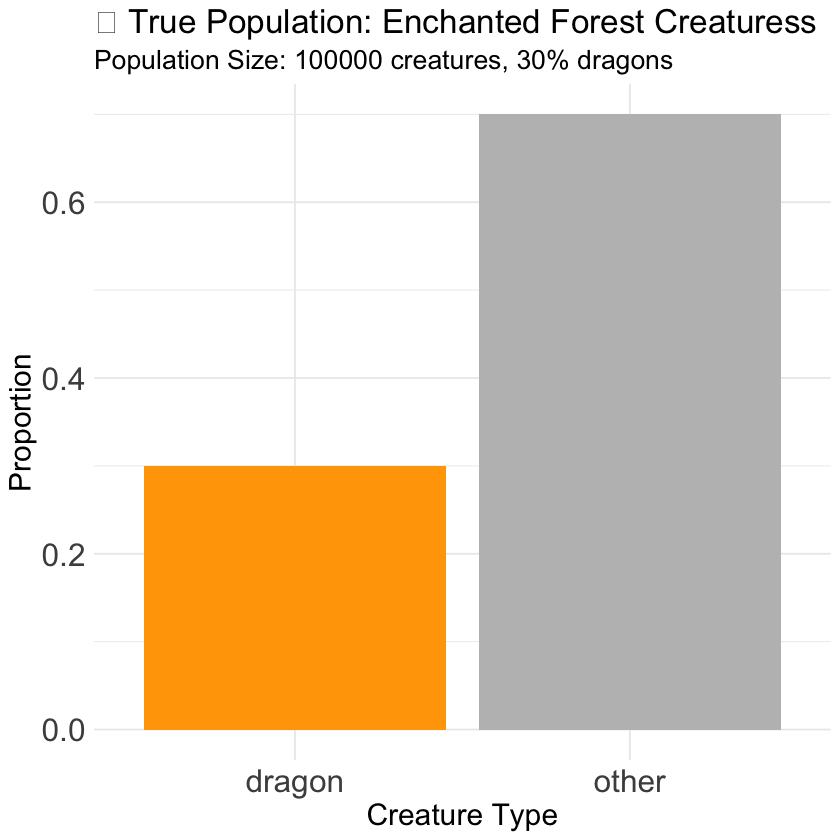

In [9]:
# Create our population of 100000 creatures
# 30000 dragons (30%) and 70000 other creatures (70%)
magical_creatures <- tibble(
  creature_id = 1:100000,
  creature_type = factor(c(rep("dragon", 30000), rep("other", 70000)))
)

# Let's verify our true population proportion
true_dragon_proportion <- sum(magical_creatures$creature_type == "dragon") / nrow(magical_creatures)
print(paste("🎯 True proportion of dragons in population:", true_dragon_proportion))

# Visualize our population
population_summary <- magical_creatures %>%
  count(creature_type) %>%
  mutate(proportion = n / sum(n))

ggplot(population_summary, aes(x = creature_type, y = proportion, fill = creature_type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("dragon" = "orange", "other" = "gray")) +
  labs(title = "🌲 True Population: Enchanted Forest Creatures",
       x = "Creature Type", 
       y = "Proportion",
       subtitle = "Population Size: 100000 creatures, 30% dragons") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        legend.position = "none")

## 🎣 Taking Our First Sample (Size 40)
Let's explore one area of the forest and see what creatures we find!

replicate,creature_id,creature_type
<int>,<int>,<fct>
1,84427,other
1,76820,other
1,82115,other
1,44196,other
1,92337,other
1,44983,other


[1] "🔍 Our first sample results:"


replicate,creature_type,n,proportion
<int>,<fct>,<int>,<dbl>
1,dragon,8,0.2
1,other,32,0.8


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 First Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 First Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 First Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 First Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 First Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call.gra

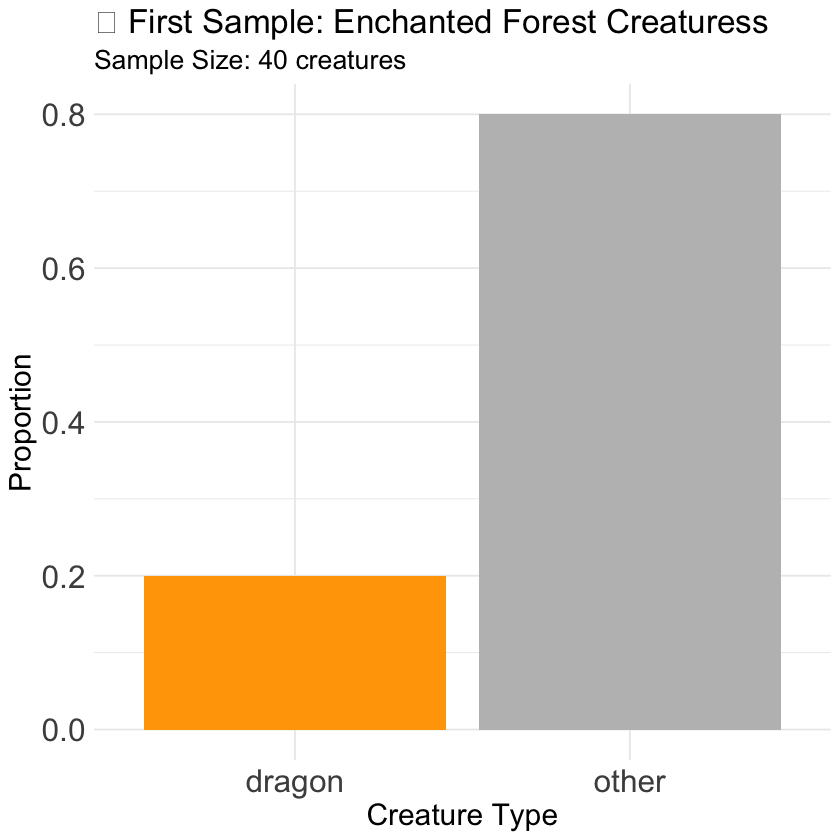

In [12]:
# Take one random sample of 40 creatures
creature_sample_1 <- rep_sample_n(magical_creatures, size = 40)
head(creature_sample_1)

# What's the proportion of dragons in our sample?
dragon_estimate_1 <- creature_sample_1 %>%
  count(creature_type) %>%
  mutate(proportion = n / sum(n))

print("🔍 Our first sample results:")
head(dragon_estimate_1)

ggplot(dragon_estimate_1, aes(x = creature_type, y = proportion, fill = creature_type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("dragon" = "orange", "other" = "gray")) +
  labs(title = "🌲 First Sample: Enchanted Forest Creatures",
       x = "Creature Type", 
       y = "Proportion",
       subtitle = "Sample Size: 40 creatures") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        legend.position = "none")

## 🎣 Taking Another Sample
What happens if we explore a different area of the forest? Will we get the same result?

[1] "🔍 Our second sample results:"


replicate,creature_type,n,proportion
<int>,<fct>,<int>,<dbl>
1,dragon,10,0.25
1,other,30,0.75


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Second Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Second Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Second Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Second Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Second Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Cal

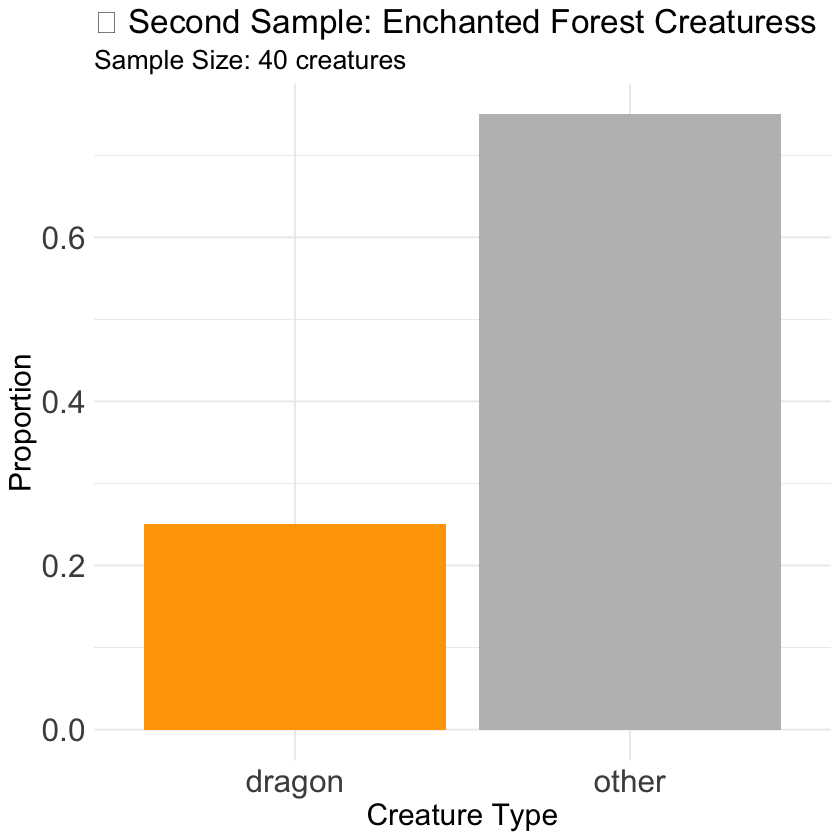

In [13]:
# Take another random sample of 40 creatures
dragon_estimate_2 <- rep_sample_n(magical_creatures, size = 40) %>%
  count(creature_type) %>%
  mutate(proportion = n / sum(n))

print("🔍 Our second sample results:")
head(dragon_estimate_2)

ggplot(dragon_estimate_2, aes(x = creature_type, y = proportion, fill = creature_type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("dragon" = "orange", "other" = "gray")) +
  labs(title = "🌲 Second Sample: Enchanted Forest Creatures",
       x = "Creature Type", 
       y = "Proportion",
       subtitle = "Sample Size: 40 creatures") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        legend.position = "none")

## 🎣 And One More Sample!
Let's try once more to see the variability between samples:

[1] "🔍 Our third sample results:"


replicate,creature_type,n,proportion
<int>,<fct>,<int>,<dbl>
1,dragon,10,0.25
1,other,30,0.75


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Third Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Third Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Third Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Third Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '🌲 Third Sample: Enchanted Forest Creatures' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in grid.Call.gra

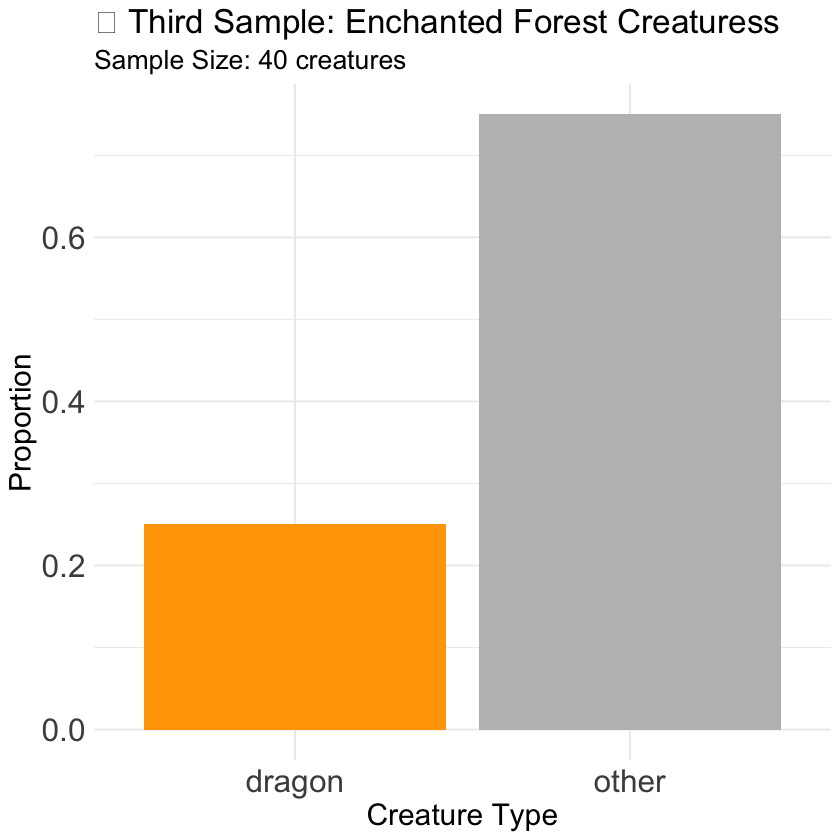

In [14]:
# Take a third random sample of 40 creatures
dragon_estimate_3 <- rep_sample_n(magical_creatures, size = 40) %>%
    count(creature_type) %>%
  mutate(proportion = n / sum(n))

print("🔍 Our third sample results:")
head(dragon_estimate_3)

ggplot(dragon_estimate_3, aes(x = creature_type, y = proportion, fill = creature_type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("dragon" = "orange", "other" = "gray")) +
  labs(title = "🌲 Third Sample: Enchanted Forest Creatures",
       x = "Creature Type", 
       y = "Proportion",
       subtitle = "Sample Size: 40 creatures") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        legend.position = "none")

## 📊 The Sampling Distribution: Taking LOTS of Samples!
What if we explore 1000 different areas of the forest? Let's see what the distribution of our estimates looks like!

In [ ]:
# Take 1000 samples of size 40 and calculate proportions for each
sampling_results <- rep_sample_n(magical_creatures, size = 40, reps = 300) %>%
  group_by(replicate) %>%
  summarize(proportion = sum(creature_type == "dragon") / 40)

mean_of_sampling <- mean(sampling_results$proportion)
sd_of_sampling <- sd(sampling_results$proportion)

# Plot the sampling distribution
ggplot(sampling_results, aes(x = proportion)) +
  geom_histogram(binwidth = 0.05, fill = "#91d4eb", color = "white", alpha = 0.7) +
  geom_vline(xintercept = true_dragon_proportion, color = "#9090ea", linetype = "solid", linewidth = 1) +
  geom_vline(xintercept = mean_of_sampling, color = "#e1b086", linetype = "dashed", linewidth = 1) +
  labs(title = "🎲 Sampling Distribution: 1000 Samples of Size 40",
       x = "Sample Proportion of Dragons", 
       y = "Count",
       subtitle = "Purple solid line shows true population proportion (0.30), Orange dashed line shows mean of sampling distribution") +
  theme_minimal() +
  theme(text = element_text(size = 12),
        plot.title = element_text(size = 16),
        axis.title = element_text(size = 15),
        axis.text = element_text(size = 12),
        legend.position = "none")


# Calculate statistics about our sampling distribution
print(paste("📊 Average of all sample proportions:", round(mean_of_sampling, 3)))
print(paste("📏 Spread (standard deviation) of sample proportions:", round(sd_of_sampling, 3)))
print(paste("🎯 True population proportion:", true_dragon_proportion))

## 📊 The Magic of Sample Size: What If We Change Sample Size?
Let's see what happens when we use different sample sizes!

In [ ]:
# Compare different sample sizes: 20, 40, and 200
sample_sizes <- c(20, 40, 200)
all_results <- tibble()

for (size in sample_sizes) {
  results <- rep_sample_n(magical_creatures, size = size, reps = 300) %>%
    group_by(replicate) %>%
    summarize(proportion = sum(creature_type == "dragon") / size,
              sample_size = paste("Size", size))
  
  all_results <- bind_rows(all_results, results)
}
  
  # Order facets small → large and compute mean per sample size for dashed lines
  all_results <- all_results %>%
    mutate(sample_size = factor(sample_size, levels = c("Size 20", "Size 40", "Size 200")))

  sample_means <- all_results %>%
    group_by(sample_size) %>%
    summarize(mean_proportion = mean(proportion), .groups = "drop")

  # Create comparison plot (3x1 facets, styled like the chart above)
  ggplot(all_results, aes(x = proportion, fill = sample_size)) +
    geom_histogram(binwidth = 0.05, color = "white", alpha = 0.7) +
    geom_vline(xintercept = true_dragon_proportion, color = "#9090ea", linetype = "solid", linewidth = 1) +
    geom_vline(data = sample_means, aes(xintercept = mean_proportion), color = "#e1b086", linetype = "dashed", linewidth = 1) +
    facet_wrap(~sample_size, ncol = 1) +
    scale_fill_manual(values = c(
      "Size 20" = "#cfe8ff",  # light blue
      "Size 40" = "#91d4eb",  # medium blue (matches above)
      "Size 200" = "#4da3d9"  # darker blue
    )) +
    labs(title = "🌟 The Magic of Sample Size: All Distributions Compared",
         x = "Sample Proportion of Dragons", 
         y = "Count",
         subtitle = "Purple line = true proportion (0.30). Orange dashed line = mean of each sampling distribution.") +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 12),
      plot.title = element_text(size = 16),
      axis.title = element_text(size = 15),
      axis.text = element_text(size = 12)
    )

# Calculate summary statistics
summary_stats <- all_results %>%
  group_by(sample_size) %>%
  summarize(
    Average_Proportion = mean(proportion),
    Spread_SD = sd(proportion),
    .groups = "drop"
  ) %>%
  mutate(True_Proportion = true_dragon_proportion,
         Difference = abs(Average_Proportion - True_Proportion))

print("🏆 Summary of All Experiments:")
print(summary_stats)

## 🎯 Key Magical Discoveries from Spell 2!

**🔍 Discovery 1: The Law of Large Numbers**
- All sample sizes give us averages close to the true population proportion (0.30)
- Larger samples don't change the average, but they make it more reliable!

**📏 Discovery 2: Sample Size and Spread**
- **Small samples (10):** High variability - samples can be quite different from each other
- **Medium samples (50):** Medium variability - samples are more consistent
- **Large samples (100):** Low variability - samples are very consistent and close to truth

**🎪 Discovery 3: The Sampling Distribution Shape**
- All sampling distributions are roughly bell-shaped (normal)
- They all center around the true population value
- Larger sample sizes create narrower, more precise distributions

## 💡 Real-World Magic Applications

**🗳️ Political Polls:** When pollsters survey 1000 people instead of 100, their predictions are much more accurate!

**🎮 Game Testing:** Game companies test with large groups to get reliable feedback about what players really think.

**🍕 Restaurant Reviews:** A restaurant with 500 reviews gives you a better idea of quality than one with 5 reviews!

**⚕️ Medical Research:** Doctors test medicines on large groups to be confident about the results.

---

# 🔮 Day 4 - Spell 3: Bootstrap Bootcamp - The Great Dragon Fire Sheep Rescue

## 📖 The Story: Dragon Fire Sheep Rescue! 🐑🔥

**URGENT QUEST ALERT!** The ancient Dragon of Mount Statistics has accidentally breathed fire across the Enchanted Meadows, where Farmer Luna (white sheep) and Farmer Obsidian (black sheep) graze their magical flocks. The fire didn't harm the sheep, but created a massive cloud of magical smoke that mixed all the flocks together!

The two farmers are worried and need to know how many of their sheep are mixed together in the smoky field. But here's the problem: the smoke is so thick that shepherds can only see a small group of sheep at a time!

**⚡ Your Challenge:** Use the ancient art of **Bootstrap Magic** to estimate what percentage of the total flock is black sheep!

## 🐑 Creating Our Magical Sheep Population
Let's create our mixed flock where 60% are black sheep and 40% are white sheep!

In [ ]:
# Create our population of 10000 magical sheep
# 6000 black sheep (60%) and 4000 white sheep (40%)
magical_sheep <- tibble(
  sheep_id = 1:10000,
  sheep_color = factor(c(rep("black", 6000), rep("white", 4000)))
)

# Let's verify our true population proportion
true_black_proportion <- sum(magical_sheep$sheep_color == "black") / nrow(magical_sheep)
print(paste("🎯 True proportion of black sheep in population:", true_black_proportion))

# Visualize our population
sheep_summary <- magical_sheep %>%
  count(sheep_color) %>%
  mutate(proportion = n / sum(n))

ggplot(sheep_summary, aes(x = sheep_color, y = proportion, fill = sheep_color)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("black" = "black", "white" = "lightgray")) +
  labs(title = "🐑 True Population: Mixed Sheep Flock",
       x = "Sheep Color", 
       y = "Proportion",
       subtitle = "Population Size: 1000 sheep, 60% black sheep") +
  theme_minimal() +
  theme(legend.position = "none")

## 💡 What is Bootstrapping?
🐑 **The Sheep Magic Trick!** You can only see 20 sheep through the smoke, but you want to know what the whole flock looks like. Bootstrapping is like having a magic hat:

**🎩 The Magic Hat Steps:**
1. **Put your 20 sheep in the magic hat** (your original sample through the smoke)
2. **Pull one sheep out, write down its color** (black or white)
3. **PUT IT BACK in the hat!** (this is the magic part - WITH REPLACEMENT)
4. **Repeat 20 times** to create a "pretend new sample"
5. **Do this magic trick hundreds of times** to see all possible pretend samples!

By doing this magic trick hundreds of times, you can imagine what it would be like if you could take hundreds of real samples from the smoky field!

## 🔍 Phase 1: Your Original Vision (Taking Our First Sample)
You can only see 20 sheep through the smoke. Let's take our first sample!

In [ ]:
# Take one original sample of 20 sheep that we can see through the smoke
original_sample <- rep_sample_n(magical_sheep, size = 20)

# Count black vs white sheep in our original sample
original_count <- original_sample %>%
  count(sheep_color) %>%
  mutate(proportion = n / sum(n))

print("🔍 Our original sample through the smoke:")
print(original_count)

ggplot(original_count, aes(x = sheep_color, y = proportion, fill = sheep_color)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("black" = "black", "white" = "lightgray")) +
  labs(title = "🐑 First sample through the smoke",
       x = "Sheep Color", 
       y = "Proportion",
       subtitle = "Sample Size: 20 sheep") +
  theme_minimal() +
  theme(legend.position = "none")

# Calculate our initial estimate
original_black_prop <- sum(original_sample$sheep_color == "black") / 20
print(paste("📊 Our estimate of black sheep percentage:", round(original_black_prop * 100, 1), "%"))
print(paste("🎯 True black sheep percentage:", round(true_black_proportion * 100, 1), "%"))

## 🔄 Phase 2: The Bootstrap Magic Ritual
Now we'll use bootstrap magic! We'll resample from our original sample WITH REPLACEMENT to create many bootstrap samples.

In [ ]:
# Let's try one bootstrap resample to see how it works
# We sample WITH REPLACEMENT from our original sample
bootstrap_sample_1 <- original_sample %>%
  ungroup() %>%
  select(sheep_color) %>%
  rep_sample_n(size = 20, replace = TRUE)

bootstrap_count <- bootstrap_sample_1 %>%
  count(sheep_color) %>%
  mutate(proportion = n / sum(n))

ggplot(bootstrap_count, aes(x = sheep_color, y = proportion, fill = sheep_color)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("black" = "black", "white" = "lightgray")) +
  labs(title = "🐑 First bootstrap sample",
       x = "Sheep Color", 
       y = "Proportion",
       subtitle = "BootstrapSample Size: 20 sheep (with replacement)") +
  theme_minimal() +
  theme(legend.position = "none")

bootstrap_prop_1 <- sum(bootstrap_sample_1$sheep_color == "black") / 20
print(paste("🎲 Bootstrap sample 1 - black sheep proportion:", round(bootstrap_prop_1, 3)))

In [ ]:
# Let's try another bootstrap sample
bootstrap_sample_2 <- original_sample %>%
  ungroup() %>%
  select(sheep_color) %>%
  rep_sample_n(size = 20, replace = TRUE)

bootstrap_count <- bootstrap_sample_2 %>%
  count(sheep_color) %>%
  mutate(proportion = n / sum(n))

ggplot(bootstrap_count, aes(x = sheep_color, y = proportion, fill = sheep_color)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("black" = "black", "white" = "lightgray")) +
  labs(title = "🐑 Second bootstrap sample",
       x = "Sheep Color", 
       y = "Proportion",
       subtitle = "BootstrapSample Size: 20 sheep (with replacement)") +
  theme_minimal() +
  theme(legend.position = "none")

bootstrap_prop_2 <- sum(bootstrap_sample_2$sheep_color == "black") / 20
print(paste("🎲 Bootstrap sample 2 - black sheep proportion:", round(bootstrap_prop_2, 3)))

In [ ]:
# And one more to see the variability
bootstrap_sample_3 <- original_sample %>%
  ungroup() %>%
  select(sheep_color) %>%
  rep_sample_n(size = 20, replace = TRUE)

bootstrap_count <- bootstrap_sample_3 %>%
  count(sheep_color) %>%
  mutate(proportion = n / sum(n))

ggplot(bootstrap_count, aes(x = sheep_color, y = proportion, fill = sheep_color)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("black" = "black", "white" = "lightgray")) +
  labs(title = "🐑 Third bootstrap sample",
       x = "Sheep Color", 
       y = "Proportion",
       subtitle = "BootstrapSample Size: 20 sheep (with replacement)") +
  theme_minimal() +
  theme(legend.position = "none")

bootstrap_prop_3 <- sum(bootstrap_sample_3$sheep_color == "black") / 20
print(paste("🎲 Bootstrap sample 3 - black sheep proportion:", round(bootstrap_prop_3, 3)))

## 🌟 The Full Bootstrap Distribution: 1000 Magic Resamples!
Now let's create many bootstrap samples to see the full distribution of possible estimates!

In [ ]:
# Create 1000 bootstrap samples from our original sample
original_sample_clean <- original_sample %>%
  ungroup() %>%
  select(sheep_color)

bootstrap_results <- original_sample_clean %>%
  rep_sample_n(size = 20, replace = TRUE, reps = 1000) %>%
  group_by(replicate) %>%
  summarize(black_proportion = sum(sheep_color == "black") / 20,
            .groups = "drop")

# Calculate statistics about our bootstrap distribution
bootstrap_mean <- mean(bootstrap_results$black_proportion)
bootstrap_sd <- sd(bootstrap_results$black_proportion)

# Plot the bootstrap distribution
ggplot(bootstrap_results, aes(x = black_proportion)) +
  geom_histogram(binwidth = 0.05, fill = "#89e5ed", color = "white", alpha = 0.7) +
  geom_vline(xintercept = original_black_prop, color = "#ce8ff0", linetype = "dashed", linewidth = 2) +
  geom_vline(xintercept = true_black_proportion, color = "#ea9d69", linetype = "solid", linewidth = 2) +
  geom_vline(xintercept = bootstrap_mean, color = "#62aa55", linetype = "longdash", linewidth = 2) +
  labs(title = "🔮 Bootstrap Distribution: 1000 Magic Resamples",
       x = "Bootstrap Sample Proportion of Black Sheep", 
       y = "Count",
       subtitle = "Purple line: Our original sample estimate, \n Orange line: True proportion, \n Green line: Mean of bootstrap distribution") +
  theme_minimal()


print(paste("📊 Average of bootstrap proportions:", round(bootstrap_mean, 3)))
print(paste("📏 Spread (standard deviation) of bootstrap proportions:", round(bootstrap_sd, 3)))
print(paste("🔍 Our original sample proportion:", round(original_black_prop, 3)))
print(paste("🎯 True population proportion:", round(true_black_proportion, 3)))

## 🏆 Phase 3: Creating Our Confidence Prophecy (Confidence Interval)
🎯 **Your Confidence Prophecy!** After doing our magic hat trick many times, we noticed that most of our "pretend samples" gave us similar results. Now we can tell the farmers: "Based on all our magic hat tricks, I'm 90% confident that the true percentage of black sheep in your mixed flock is somewhere in this range!" 

It's like saying "I'm pretty sure the answer is somewhere between these two numbers, but I can't be 100% certain because I could only see a small part of the flock through the smoke."

In [ ]:
# Calculate 90% confidence interval
# This means we're 90% confident the true proportion is in this range
confidence_level <- 0.90
alpha <- 1 - confidence_level
lower_percentile <- (alpha / 2) * 100
upper_percentile <- (1 - alpha / 2) * 100

confidence_interval <- quantile(bootstrap_results$black_proportion, 
                               probs = c(alpha/2, 1 - alpha/2))

print("🔮 Our 90% Confidence Prophecy (Confidence Interval):")
print(paste("We are 90% confident that the true proportion of black sheep is between", 
            round(confidence_interval[1], 3), "and", round(confidence_interval[2], 3)))

# Did our confidence interval capture the true value?
captured_truth <- (true_black_proportion >= confidence_interval[1]) & 
                  (true_black_proportion <= confidence_interval[2])

if (captured_truth) {
  print("🎉 SUCCESS! Our confidence interval captured the true proportion!")
} else {
  print("😅 Oops! Our confidence interval missed the true proportion this time.")
}

# Visualize our confidence interval

ggplot(bootstrap_results, aes(x = black_proportion)) +
  geom_histogram(binwidth = 0.05, fill = "#89e5ed", color = "white", alpha = 0.7) +
  geom_vline(xintercept = original_black_prop, color = "#ce8ff0", linetype = "dashed", linewidth = 2) +
  geom_vline(xintercept = true_black_proportion, color = "#ea9d69", linetype = "solid", linewidth = 2) +
  geom_vline(xintercept = bootstrap_mean, color = "#62aa55", linetype = "longdash", linewidth = 2) +
  geom_vline(xintercept = confidence_interval[1], color = "#9ecb97", linetype = "dotted", linewidth = 1) +
  geom_vline(xintercept = confidence_interval[2], color = "#9ecb97", linetype = "dotted", linewidth = 1) +
  labs(title = "🔮 Bootstrap Distribution: 1000 Magic Resamples with 90% Confidence Prophecy",
       x = "Bootstrap Sample Proportion of Black Sheep", 
       y = "Count",
       subtitle = "Purple line: Our original sample estimate, \n Orange line: True proportion, \n Green line: Mean of bootstrap distribution \n Green dotted lines: 90% Confidence Prophecy") +
  theme_minimal()

## 🎲 Experiment: What If We Had Different Sample Sizes?
Let's see how our confidence gets better with larger samples!

In [ ]:
# Function to create bootstrap CI for different sample sizes
create_bootstrap_ci <- function(sample_size, n_bootstrap = 500) {
  # Take original sample of given size
  sample_data <- rep_sample_n(magical_sheep, size = sample_size)
  sample_clean <- sample_data %>% ungroup() %>% select(sheep_color)
  
  # Create bootstrap distribution
  bootstrap_dist <- sample_clean %>%
    rep_sample_n(size = sample_size, replace = TRUE, reps = n_bootstrap) %>%
    group_by(replicate) %>%
    summarize(black_proportion = sum(sheep_color == "black") / sample_size,
              .groups = "drop")
  
  # Calculate 90% CI
  ci <- quantile(bootstrap_dist$black_proportion, probs = c(0.05, 0.95))
  
  return(list(
    sample_size = sample_size,
    ci_lower = ci[1],
    ci_upper = ci[2],
    ci_width = ci[2] - ci[1],
    bootstrap_dist = bootstrap_dist
  ))
}

# Compare different sample sizes
sample_sizes <- c(10, 20, 50, 200, 500)
ci_results <- tibble()

for (size in sample_sizes) {
  result <- create_bootstrap_ci(size)
  new_row <- tibble(
    sample_size = result$sample_size,
    ci_lower = result$ci_lower,
    ci_upper = result$ci_upper,
    ci_width = result$ci_width
  )
  ci_results <- bind_rows(ci_results, new_row)
}

print("🔬 How Sample Size Affects Confidence Interval Width:")
print(ci_results)

# Visualize the effect of sample size
ggplot(ci_results, aes(x = factor(sample_size))) +
  geom_linerange(aes(ymin = ci_lower, ymax = ci_upper), linewidth = 3, color = "#9ecb97") +
  geom_hline(yintercept = true_black_proportion, color = "#ea9d69", linetype = "dashed") +
  labs(title = "🎯 Magic of Sample Size: Confidence Intervals \nGet Narrower!",
       x = "Sample Size",
       y = "90% Confidence Interval",
       subtitle = "Orange line: True proportion. Green lines: Confidence intervals") +
  theme_minimal()